In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv("/content/transfusion.csv")

In [ ]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
# Exploratory Data Analysis (EDA)
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None


In [6]:
# Display descriptive statistics
print(df.describe())

       Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471   
std            8.095396           5.839307            1459.826781   
min            0.000000           1.000000             250.000000   
25%            2.750000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  whether he/she donated blood in March 2007  
count     748.000000                                  748.000000  
mean       34.282086                                    0.237968  
std        24.376714                                    0.426124  
min         2.000000                                    0.000000  
25%        16.000000                       

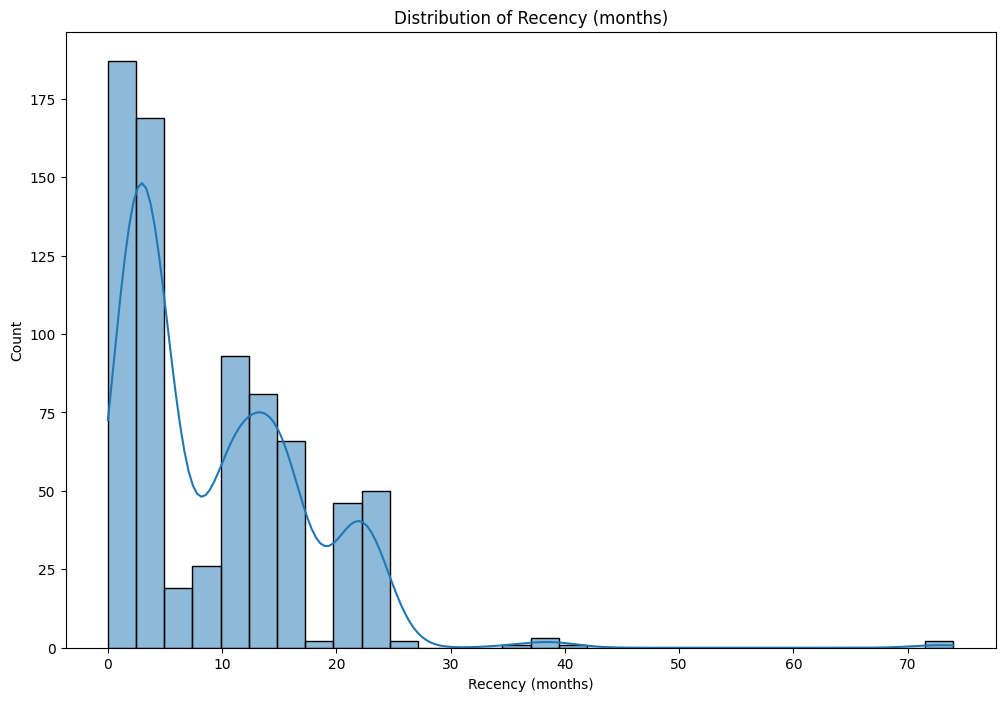

In [9]:
# Visualize the distribution of each feature
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Recency (months)', kde=True)
plt.title('Distribution of Recency (months)')
plt.show()

In [11]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('whether he/she donated blood in March 2007', axis=1)
y = df['whether he/she donated blood in March 2007']


In [12]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['whether he/she donated blood in March 2007'])

# Split the data into features and target variable
X = df.drop(['whether he/she donated blood in March 2007', 'Target'], axis=1)
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'MLP Classifier': MLPClassifier(max_iter=1000),  # Adjust max_iter based on convergence
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge()
}


In [ ]:
# Model training and evaluation
for model_name, model in models.items():
    try:
        # Check if the model has the 'predict_proba' method
        if hasattr(model, "predict_proba"):
            model.fit(X_train_scaled, y_train)
            y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
        else:
            # If 'predict_proba' is not available, use 'predict' method
            model.fit(X_train_scaled, y_train)
            y_pred_prob = model.decision_function(X_test_scaled)
    except AttributeError:
        # For models without 'decision_function', use 'predict' method
        model.fit(X_train_scaled, y_train)
        y_pred_prob = model.predict(X_test_scaled)

    # Convert predicted probabilities to binary predictions
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Check data types
    print(f"y_test data type: {y_test.dtype}")
    print(f"y_pred data type: {y_pred.dtype}")

    # Check unique values
    print(f"Unique values in y_test: {pd.unique(y_test)}")
    print(f"Unique values in y_pred: {pd.unique(y_pred)}")

    # Model evaluation using ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    print(f"\n{model_name}:\nROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))


y_test data type: int64
y_pred data type: int64
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]

Random Forest:
ROC AUC: 0.6680
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       113
           1       0.36      0.24      0.29        37

    accuracy                           0.71       150
   macro avg       0.57      0.55      0.55       150
weighted avg       0.67      0.71      0.69       150

y_test data type: int64
y_pred data type: int64
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]

Decision Tree:
ROC AUC: 0.5381
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       113
           1       0.28      0.22      0.24        37

    accuracy                           0.67       150
   macro avg       0.52      0.52      0.51       150
weighted avg       0.64      0.67      0.65       150

y_test data type: int64
y_pred data type: int64
Unique values 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Hyperparameter tuning (GridSearchCV example for RandomForestClassifier)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)
y_pred_tuned = best_rf_model.predict(X_test_scaled)

In [ ]:
# Model evaluation after tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned)

print(f"\nTuned Random Forest Model:\nAccuracy: {accuracy_tuned:.4f}\nROC AUC: {roc_auc_tuned:.4f}")
print(classification_report(y_test, y_pred_tuned))


Tuned Random Forest Model:
Accuracy: 0.7800
ROC AUC: 0.5995
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       113
           1       0.64      0.24      0.35        37

    accuracy                           0.78       150
   macro avg       0.72      0.60      0.61       150
weighted avg       0.76      0.78      0.74       150



In [ ]:
# Deep Learning model
model_dl = Sequential()
model_dl.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_dl.add(Dense(1, activation='sigmoid'))

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_dl.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
15/15 [==============================] - 1s 28ms/step - loss: 0.6173 - accuracy: 0.7573 - val_loss: 0.5686 - val_accuracy: 0.7917
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.5778 - accuracy: 0.7573 - val_loss: 0.5268 - val_accuracy: 0.7917
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.5493 - accuracy: 0.7573 - val_loss: 0.4960 - val_accuracy: 0.7917
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.5288 - accuracy: 0.7573 - val_loss: 0.4726 - val_accuracy: 0.7917
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.5143 - accuracy: 0.7573 - val_loss: 0.4543 - val_accuracy: 0.8000
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.5045 - accuracy: 0.7573 - val_loss: 0.4409 - val_accuracy: 0.8000
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.4972 - accuracy: 0.7741 - val_loss: 0.4302 - val_accuracy: 0.8333
Epoch 8/10
15/15 [=

In [ ]:
# Evaluate the deep learning model
y_pred_dl_prob = model_dl.predict(X_test_scaled)
y_pred_dl = (y_pred_dl_prob > 0.5).astype(int)

accuracy_dl = accuracy_score(y_test, y_pred_dl)
roc_auc_dl = roc_auc_score(y_test, y_pred_dl_prob)

print(f"\nDeep Learning Model:\nAccuracy: {accuracy_dl:.4f}\nROC AUC: {roc_auc_dl:.4f}")
print(classification_report(y_test, y_pred_dl))


5/5 [==============================] - 0s 3ms/step

Deep Learning Model:
Accuracy: 0.7533
ROC AUC: 0.7473
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       113
           1       0.50      0.14      0.21        37

    accuracy                           0.75       150
   macro avg       0.64      0.55      0.53       150
weighted avg       0.70      0.75      0.70       150

